In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data,digits.target

In [4]:
X.shape

(1797, 64)

In [5]:
print("Number of labels:", len(np.unique(y)))

Number of labels: 10


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

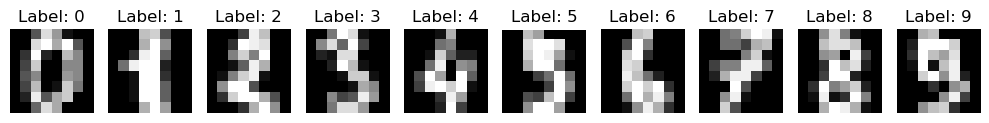

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(1437, 64)

In [17]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
y_pred_linear = svm_linear.predict(X_test)

In [22]:
cr_linear = classification_report(y_test,y_pred_linear)
print("Classification Report (linear Kernal):\n",cr_linear)

Classification Report (linear Kernal):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid_rbf = {
    'C' :[0.1,1,10],
    'gamma':[0.001,0.01,0.1]
}

In [26]:
svm_rbf = GridSearchCV(SVC(kernel = 'rbf'),param_grid_rbf,cv = 5)
svm_rbf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]})

In [27]:
print("Best Parameters (RBF Kernel):", svm_rbf.best_params_)

Best Parameters (RBF Kernel): {'C': 10, 'gamma': 0.001}


In [29]:
y_pred_rbf = svm_rbf.predict(X_test)

In [30]:
cr_rbf = classification_report(y_pred_rbf,y_test)
print("\nClassification Report (RBF Kernel):\n",cr_rbf)


Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [31]:
svm_poly = SVC(kernel = 'poly',degree =3,C=1)
svm_poly.fit(X_train,y_train)

SVC(C=1, kernel='poly')

In [32]:
y_pred_poly = svm_poly.predict(X_test)

In [33]:
cr_poly = classification_report(y_test, y_pred_poly)
print("Classification Report (Polynomial Kernel):\n",cr_poly)

Classification Report (Polynomial Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       1.00      0.98      0.99        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [34]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print()         

evaluate_model("SVM Linear", y_test, y_pred_linear)
evaluate_model("SVM RBF", y_test, y_pred_rbf)
evaluate_model("SVM Polynomial", y_test, y_pred_poly)

--- SVM Linear ---
Accuracy:  0.9778
Precision: 0.9779
Recall:    0.9778
F1 Score:  0.9777

--- SVM RBF ---
Accuracy:  0.9889
Precision: 0.9890
Recall:    0.9889
F1 Score:  0.9889

--- SVM Polynomial ---
Accuracy:  0.9917
Precision: 0.9917
Recall:    0.9917
F1 Score:  0.9917



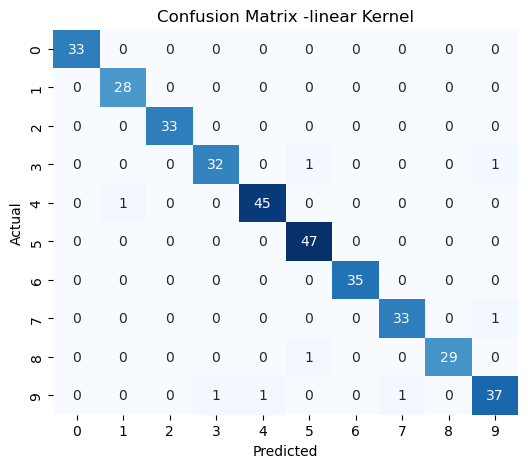

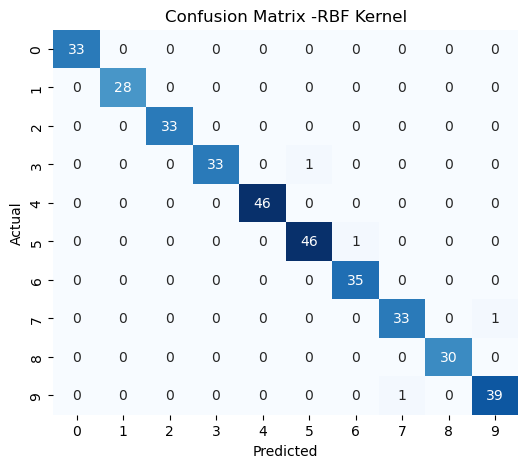

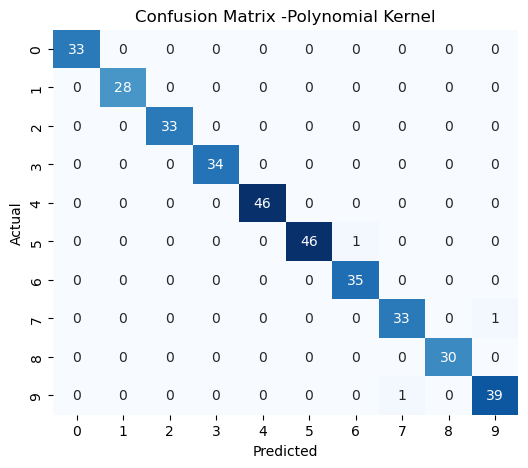

In [40]:
def plot_confusion_matrix(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm,annot =True,cbar=False,cmap = 'Blues')
    plt.title(f'Confusion Matrix -{title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(y_test,y_pred_linear,"linear Kernel")
plot_confusion_matrix(y_test, y_pred_rbf, "RBF Kernel")
plot_confusion_matrix(y_test, y_pred_poly, "Polynomial Kernel")

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [47]:
X_train_2D,X_test_2D,y_train_2D,y_test_2D = train_test_split(X_reduced,y,test_size=0.2,random_state=42)
X_test_2D.shape

(360, 2)

In [49]:
svm_linear_2D = SVC(kernel = 'linear').fit(X_train_2D,y_train_2D)
svm_rbf_2D = SVC(kernel='rbf', C=10, gamma=0.001).fit(X_train_2D, y_train_2D)
svm_poly_2D = SVC(kernel='poly', degree=3, C=1).fit(X_train_2D, y_train_2D)

In [50]:
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10, edgecolors='k', s=20)
    plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.tight_layout()
    plt.show()


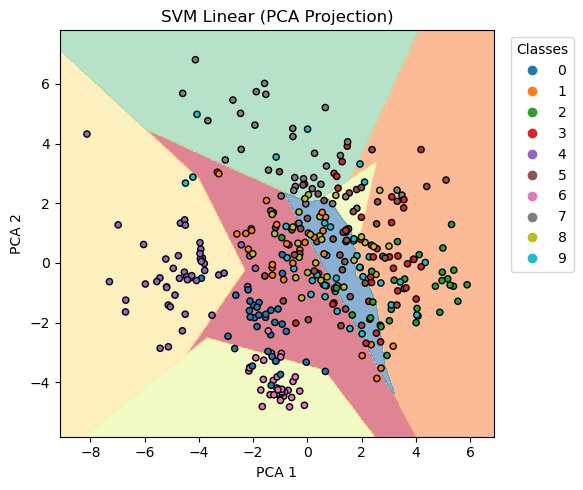

In [51]:
plot_decision_boundary(svm_linear_2D, X_test_2D, y_test_2D, "SVM Linear (PCA Projection)")

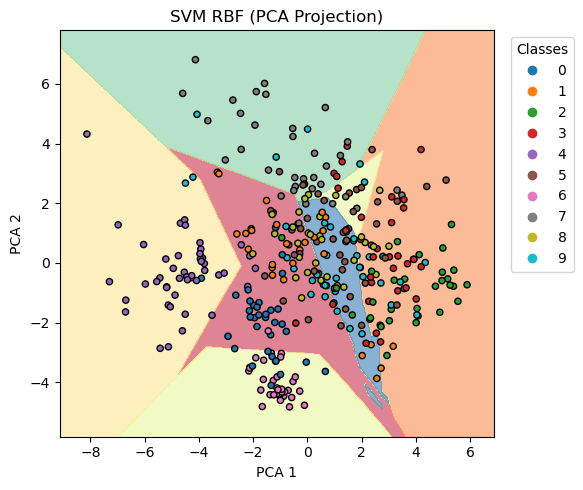

In [52]:
plot_decision_boundary(svm_rbf_2D, X_test_2D, y_test_2D, "SVM RBF (PCA Projection)")

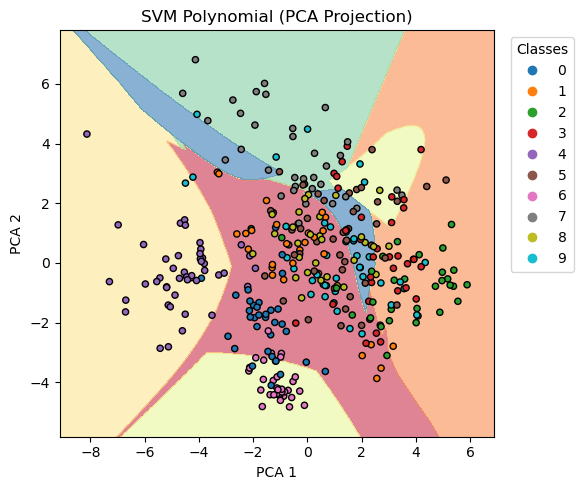

In [53]:
plot_decision_boundary(svm_poly_2D, X_test_2D, y_test_2D, "SVM Polynomial (PCA Projection)")